# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset Loading

In [5]:
df= pd.read_csv("Customer Churn.csv")
df

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                          17          3            1       1   30   
1                           4          2            1       2   25   
2                          24          3            1       1   30   
3                          35          1            1       1   15   
4                          33          1            1       1   15   
...                       ...        ...          ...     ...  ...   
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  Churn  
0            197.640      0  
1             46.035      0  
2           1536.520      0  
3            240.020      0  
4            145.805      0  
...              ...    ...  
3145         721.980      0  
3146         261.210      0  
3147         280.320      0  
3148        1077.640      0  
3149         100.680      1  

[3150 rows x 14 columns]

# Data Preprocessing

In [8]:
df["Age Group"].value_counts()

Age Group
3    1425
2    1037
4     395
5     170
1     123
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

# Understanding Dataset

In [5]:
df.shape

(3150, 14)

In [6]:
df.columns.values

array(['Call  Failure', 'Complains', 'Subscription  Length',
       'Charge  Amount', 'Seconds of Use', 'Frequency of use',
       'Frequency of SMS', 'Distinct Called Numbers', 'Age Group',
       'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn'],
      dtype=object)

In [7]:
df_describe = df.describe().T
df_describe

count         mean          std   min         25%  \
Call  Failure            3150.0     7.627937     7.263886   0.0     1.00000   
Complains                3150.0     0.076508     0.265851   0.0     0.00000   
Subscription  Length     3150.0    32.541905     8.573482   3.0    30.00000   
Charge  Amount           3150.0     0.942857     1.521072   0.0     0.00000   
Seconds of Use           3150.0  4472.459683  4197.908687   0.0  1391.25000   
Frequency of use         3150.0    69.460635    57.413308   0.0    27.00000   
Frequency of SMS         3150.0    73.174921   112.237560   0.0     6.00000   
Distinct Called Numbers  3150.0    23.509841    17.217337   0.0    10.00000   
Age Group                3150.0     2.826032     0.892555   1.0     2.00000   
Tariff Plan              3150.0     1.077778     0.267864   1.0     1.00000   
Status                   3150.0     1.248254     0.432069   1.0     1.00000   
Age                      3150.0    30.998413     8.831095  15.0    25.00000   
Customer Value           3150.0   470.972916   517.015433   0.0   113.80125   
Churn                    3150.0     0.157143     0.363993   0.0     0.00000   

                             50%         75%       max  
Call  Failure               6.00    12.00000     36.00  
Complains                   0.00     0.00000      1.00  
Subscription  Length       35.00    38.00000     47.00  
Charge  Amount              0.00     1.00000     10.00  
Seconds of Use           2990.00  6478.25000  17090.00  
Frequency of use           54.00    95.00000    255.00  
Frequency of SMS           21.00    87.00000    522.00  
Distinct Called Numbers    21.00    34.00000     97.00  
Age Group                   3.00     3.00000      5.00  
Tariff Plan                 1.00     1.00000      2.00  
Status                      1.00     1.00000      2.00  
Age                        30.00    30.00000     55.00  
Customer Value            228.48   788.38875   2165.28  
Churn                       0.00     0.00000      1.00

# Checking for categorical and numerical data

In [8]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

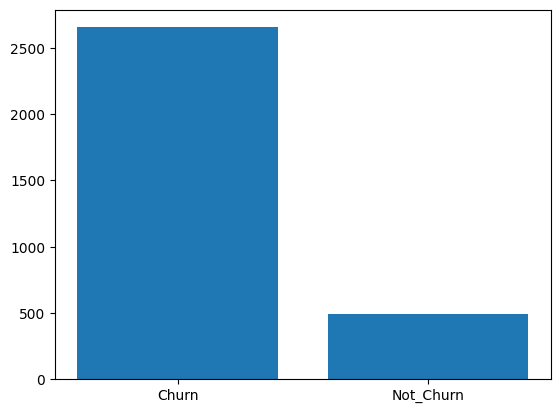

In [9]:
Label_=["Churn" , "Not_Churn"]
size_= df['Churn'].value_counts(sort=True)
plt.bar(Label_ , size_)
plt.show()

In [10]:
print("Churn:0")
mean_df=df.loc[df["Churn"]==0].mean().reset_index()
mean_df.columns = ["Feature" , "Mean"]
mean_df.set_index("Feature")

Churn:0


Mean
Feature                             
Call  Failure               7.656121
Complains                   0.015443
Subscription  Length       32.662524
Charge  Amount              1.075706
Seconds of Use           5014.224105
Frequency of use           76.979284
Frequency of SMS           83.871563
Distinct Called Numbers    25.582674
Age Group                   2.831638
Tariff Plan                 1.090019
Status                      1.155179
Age                        31.065913
Customer Value            535.511501
Churn                       0.000000

In [11]:
print("Churn:1")
mean_df=df.loc[df["Churn"]==1].mean().reset_index()
mean_df.columns=["Feature" ,"Mean"]
mean_df.set_index("Feature")

Churn:1


Mean
Feature                             
Call  Failure               7.476768
Complains                   0.404040
Subscription  Length       31.894949
Charge  Amount              0.230303
Seconds of Use           1566.632323
Frequency of use           29.133333
Frequency of SMS           15.802020
Distinct Called Numbers    12.391919
Age Group                   2.795960
Tariff Plan                 1.012121
Status                      1.747475
Age                        30.636364
Customer Value            124.811414
Churn                       1.000000

# Exploratory Data Analysis (EDA) to check the correlation between features.

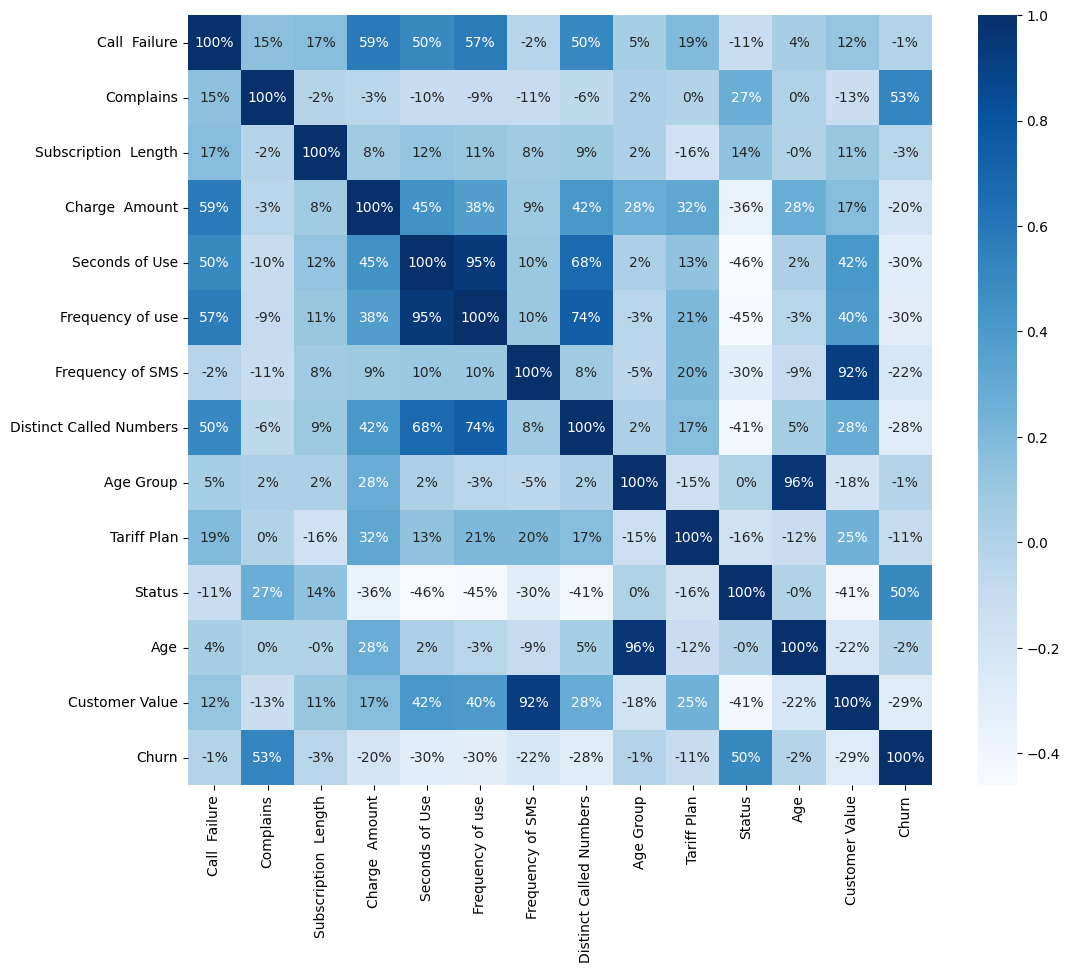

In [12]:
import seaborn as sns
axis = plt.figure(figsize=(12,10))
sns.heatmap(df.corr() , annot= True , cmap = "Blues" , fmt=".0%")
plt.show()

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler().fit(df.drop("Churn" , axis=1))

In [14]:
X= scaler.transform(df.drop("Churn" , axis=1))
Y= df["Churn"]
X_train , X_test ,Y_train, Y_test=train_test_split(X,Y,test_size=0.10 , random_state=0)

# Classification

In [15]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [16]:
acc=[]
model_name=['LR','DT','PER','RF','KNN']

#  Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10000)
model.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=10000, multi_class='multinomial', solver='saga')

In [18]:
y_pred=model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc_lr=accuracy_score(Y_test,y_pred)
acc.append(acc_lr)
acc_lr

0.8666666666666667

In [20]:
print(confusion_matrix(Y_test,y_pred))

[[246   8]
 [ 34  27]]


# DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=100)
clf.fit(X_train, Y_train.values.ravel())

DecisionTreeClassifier(max_depth=100)

In [22]:
y_pred=clf.predict(X_test)

In [23]:
print(confusion_matrix(Y_test,y_pred))

[[243  11]
 [ 13  48]]


In [24]:
acc_decisionT=accuracy_score(Y_test,y_pred)
acc.append(acc_decisionT)
acc_decisionT

0.9238095238095239

# Perceptron

In [25]:
from sklearn.linear_model import Perceptron
clf3=Perceptron()
clf3.fit(X_train, Y_train.values.ravel())

Perceptron()

In [26]:
y_pred=clf3.predict(X_test)
conf_mat=confusion_matrix(Y_test,y_pred)

<Axes: >

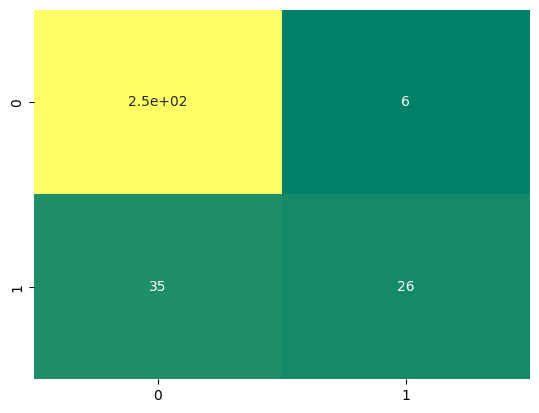

In [27]:
sns.heatmap(conf_mat,annot=True,cbar=False,cmap='summer')

In [28]:
acc_per=accuracy_score(Y_test,y_pred)
acc.append(acc_per)
acc_per

0.8698412698412699

# RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
cl_random=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=1000)
cl_random.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=1000, n_estimators=20)

In [30]:
y_pred=cl_random.predict(X_test)
print(confusion_matrix(Y_test,y_pred))

[[246   8]
 [ 15  46]]


In [31]:
acc_rfc=accuracy_score(Y_test,y_pred)
acc.append(acc_rfc)
acc_rfc

0.926984126984127

# K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)

In [33]:
print(confusion_matrix(Y_test,y_pred))

[[245   9]
 [ 10  51]]


In [34]:
acc_knn=accuracy_score(Y_test,y_pred)
acc.append(acc_knn)
acc_knn

0.9396825396825397

# Comparing the Models

In [35]:
print(acc)

[0.8666666666666667, 0.9238095238095239, 0.8698412698412699, 0.926984126984127, 0.9396825396825397]


<BarContainer object of 5 artists>

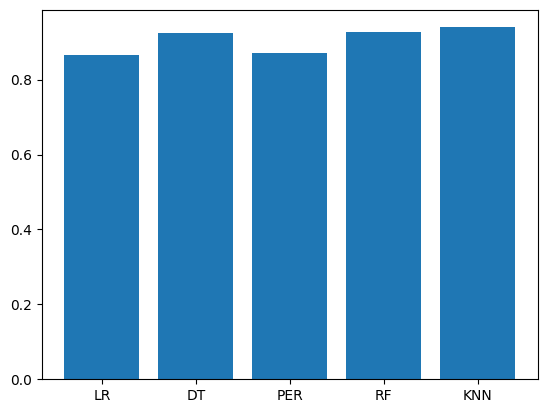

In [36]:
 plt.bar(model_name,acc)

# Making prediction from model

In [37]:

input_data2=(8,	0	,38,	0,	4370,	71,	5,	17,	3	,1	,1,	30	,197.640)
input_data_as_numpy_array = np.asarray(input_data2)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

X= scaler.transform(input_data_reshaped)

prediction =knn.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('Customer is not churn')
else:
  print('Customer is churn')

[[8.0000e+00 0.0000e+00 3.8000e+01 0.0000e+00 4.3700e+03 7.1000e+01
  5.0000e+00 1.7000e+01 3.0000e+00 1.0000e+00 1.0000e+00 3.0000e+01
  1.9764e+02]]
[[ 0.05122913 -0.2878304   0.63672633 -0.61996205 -0.02441119  0.02681625
  -0.60751272 -0.37815805  0.19494132 -0.29040893 -0.57466206 -0.11307444
  -0.52875851]]
[0]
Customer is not churn


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:

input_data2=(8	,1,	11	,2,	1792,	25,	7	,9,	3,	1,	1,	30,	100.680	)
input_data_as_numpy_array = np.asarray(input_data2)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

X= scaler.transform(input_data_reshaped)

prediction =knn.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('Customer is not churn')
else:
  print('Customer is churn')

[[8.0000e+00 1.0000e+00 1.1000e+01 2.0000e+00 1.7920e+03 2.5000e+01
  7.0000e+00 9.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 3.0000e+01
  1.0068e+02]]
[[ 0.05122913  3.47426818 -2.51301919  0.69510896 -0.638624   -0.77451893
  -0.58969054 -0.84287974  0.19494132 -0.29040893 -0.57466206 -0.11307444
  -0.71632621]]
[1]
Customer is churn


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Saving Model

In [39]:
import pickle

In [41]:
filename = 'trained_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [42]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [43]:

input_data2=(8	,1,	11	,2,	1792,	25,	7	,9,	3,	1,	1,	30,	100.680	)
input_data_as_numpy_array = np.asarray(input_data2)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

X= scaler.transform(input_data_reshaped)

prediction =loaded_model.predict(X)
print(prediction)

if (prediction[0] == 0):
  print('Customer is not churn')
else:
  print('Customer is churn')

[1]
Customer is churn


C:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
